Installing the necesary dependencies and auxiliar libraries like gdal, wheel and pipwin to avoid errors

In [ ]:
pip install wheel pipwin

In [ ]:

pip install wheel
pip install pipwin

pipwin install numpy
pipwin install pandas
pipwin install shapely
pipwin install gdal
pipwin install geopandas

Import the necessary libraries

In [1]:

import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import os.path

from shapely.geometry import Polygon
from os import path

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")


Read the shp file to crop and validate its information

In [2]:
road_map_at_path = "data/SISBELAGO/SISBELAGOGDPolygon.shp"
road_map_at = gpd.read_file(road_map_at_path)
road_map_at

,ANFANGDATU,BAUKENN,BAUKENN_TX,BELAG,BELAG_TXT,BEZIRK,BORDSTA,ERHALTUNG,ERHALTUNG_,FLAECHE,...,TYPE,TYPE_TXT,UMFANG,UPDATEDATU,VERWALTUNG,VERWALTUN0,WERTIGKEIT,WERTIGKEI0,SE_SDO_ROW,geometry
0,2013-05-28,None,None,GA,Gussasphalt Gehsteig,02,3,PRIV,Private,59.674,...,GG,Gehsteig,39.014,2022-08-07,MA28,Straßenbau und Verwaltung,L,Landesstraße,2.043341e+09,"POLYGON ((4126.946 342863.931, 4113.711 342872..."
1,2015-11-27,None,None,GA,Gussasphalt Gehsteig,02,3,MA28,Straßenbau und Verwaltung,0.050,...,GG,Gehsteig,1.331,2022-08-07,MA28,Straßenbau und Verwaltung,L,Landesstraße,2.043341e+09,"POLYGON ((4128.683 342866.608, 4128.841 342867..."
2,2013-05-28,None,None,KB,kein Belag,02,1,MA42,Stadtgartenamt,4.370,...,UN,Unbefestigtes,8.275,2022-08-07,MA28,Straßenbau und Verwaltung,L,Landesstraße,2.043341e+09,"POLYGON ((4126.540 342868.670, 4126.750 342869..."
3,2021-07-15,None,None,GO,Großsteinpfl. ohne Fugenverguss,02,None,MA28,Straßenbau und Verwaltung,13.079,...,GG,Gehsteig,19.718,2022-08-07,MA28,Straßenbau und Verwaltung,L,Landesstraße,2.043341e+09,"POLYGON ((4126.540 342868.670, 4123.448 342870..."
4,2021-04-20,U,Umbau,AB,Asphaltbeton,02,None,MA28,Straßenbau und Verwaltung,2.894,...,IS,Insel,7.949,2022-08-07,MA28,Straßenbau und Verwaltung,L,Landesstraße,2.043341e+09,"POLYGON ((4130.325 342872.538, 4130.054 342871..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15583,2022-05-30,None,None,ZP,Zementbetonplatten,01,None,WL,Wiener Linien,0.004,...,TS,selbstständiger Gleiskörper,2.283,2022-08-08,MA28,Straßenbau und Verwaltung,G,Gemeindestraße,2.043381e+09,"POLYGON ((2929.843 341998.716, 2929.751 341998..."
15584,2022-05-30,U,Umbau,ZP,Zementbetonplatten,01,3,WL,Wiener Linien,15.110,...,IS,Insel,56.044,2022-08-08,MA28,Straßenbau und Verwaltung,G,Gemeindestraße,2.043381e+09,"POLYGON ((2950.237 341981.900, 2949.773 341981..."
15585,2022-01-12,None,None,GA,Gussasphalt Gehsteig,02,4,MA28,Straßenbau und Verwaltung,43.779,...,GG,Gehsteig,32.869,2022-08-08,MA28,Straßenbau und Verwaltung,L,Landesstraße,2.043383e+09,"POLYGON ((3606.269 342152.257, 3605.952 342139..."
15586,2022-01-12,None,None,GA,Gussasphalt Gehsteig,02,4,PRIV,Private,10.529,...,EE,Einfahrt,12.983,2022-08-08,MA28,Straßenbau und Verwaltung,L,Landesstraße,2.043383e+09,"POLYGON ((3605.952 342139.177, 3605.875 342135..."


Take the dimensions of the shp file and make a grid for clip it

17 20


<AxesSubplot:>

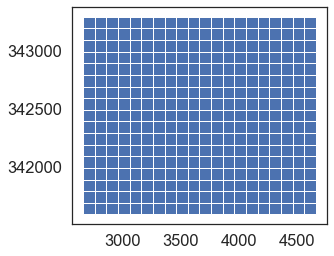

In [3]:
points = road_map_at
xmin,ymin,xmax,ymax =  points.total_bounds
cell_width = 100
cell_height = 100
rows = int(np.ceil((ymax-ymin) /  cell_height))
cols = int(np.ceil((xmax-xmin) / cell_width))
print(rows, cols)
XleftOrigin = xmin
XrightOrigin = xmin + cell_width
YtopOrigin = ymax
YbottomOrigin = ymax- cell_height
polygons = []
for i in range(cols):
    Ytop = YtopOrigin
    Ybottom =YbottomOrigin
    for j in range(rows):
        polygons.append(Polygon([(XleftOrigin, Ytop), (XrightOrigin, Ytop), (XrightOrigin, Ybottom), (XleftOrigin, Ybottom)])) 
        Ytop = Ybottom
        Ybottom = Ybottom - cell_height
    XleftOrigin = XrightOrigin
    XrightOrigin = XrightOrigin + cell_width

grid = gpd.GeoDataFrame({'geometry':polygons})
#grid.to_file("grid.shp") if we want to save it has a shp file with all the other necessary files
grid.plot()

Plot the shp overlaid with the grid

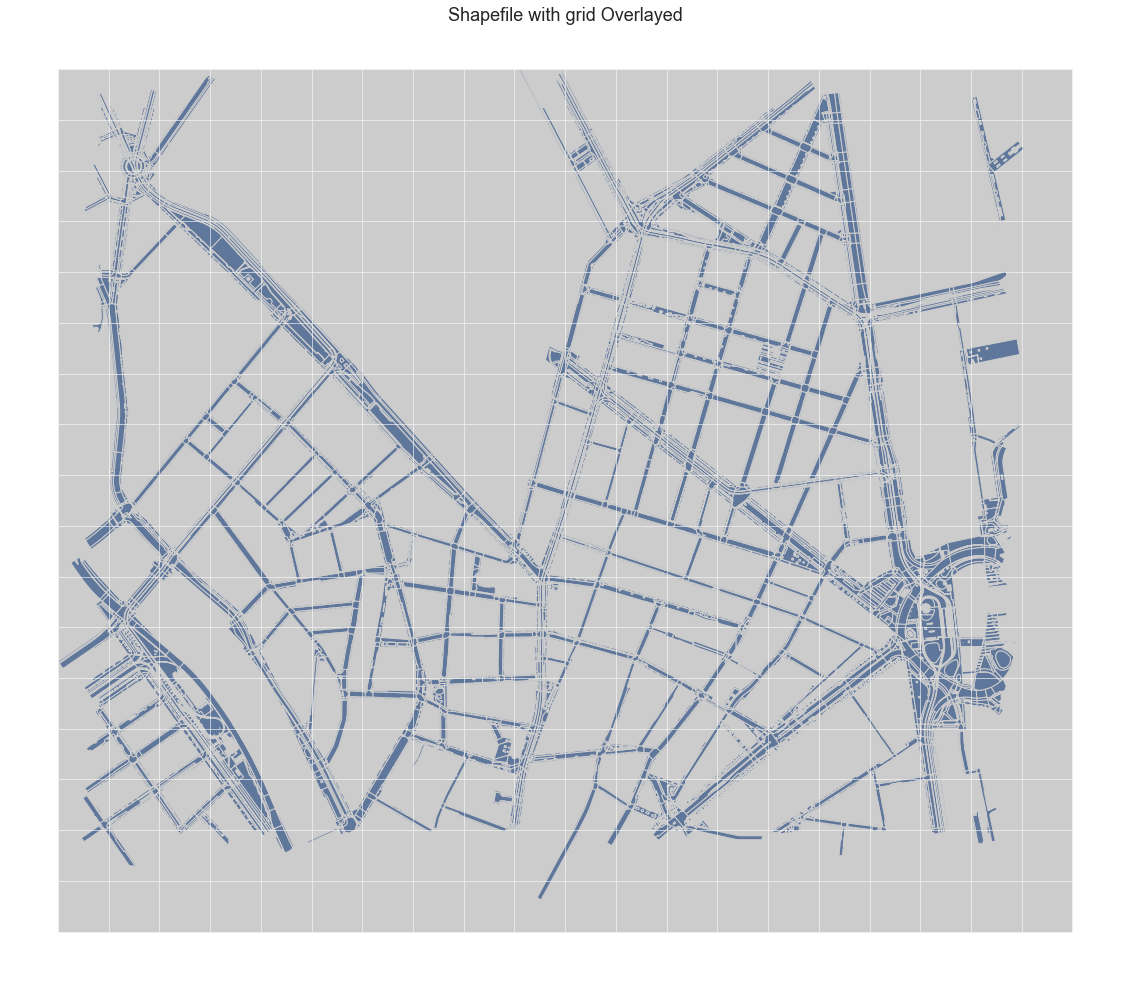

In [4]:
f, ax = plt.subplots(figsize=(20, 20))
road_map_at.plot(ax=ax)
grid.plot(ax=ax, color="gray", alpha=0.4)
ax.set(title="Shapefile with grid Overlayed")
ax.set_axis_off()
plt.show()

Clip each square and save the result into filesystem

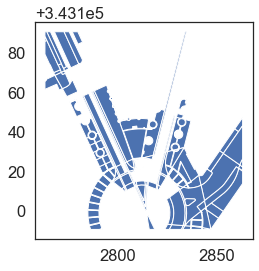

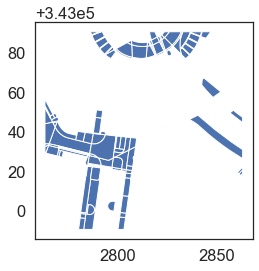

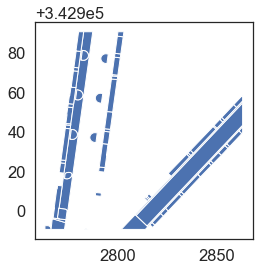

In [6]:
for x in range(18, 21):
  cell=grid.loc[x, ('geometry')]
  map_clipped = gpd.clip(road_map_at,cell)
  if(map_clipped.empty):
    print("The next cell does not contain any type of information: ",x)
  else:
    map_clipped.plot()
    #print(map_clipped)
    os.mkdir('results/my_result%s'%x)
    map_clipped.to_file("results/my_result%s/MyResult%s.shp"%(x,x) , mode="w")

Check the information of a part

In [7]:
road_map_clipped = gpd.read_file("results\my_result19\MyResult19.shp")
road_map_clipped

,ANFANGDATU,BAUKENN,BAUKENN_TX,BELAG,BELAG_TXT,BEZIRK,BORDSTA,ERHALTUNG,ERHALTUNG_,FLAECHE,...,TYPE,TYPE_TXT,UMFANG,UPDATEDATU,VERWALTUNG,VERWALTUN0,WERTIGKEIT,WERTIGKEI0,SE_SDO_ROW,geometry
0,2020-09-09,None,None,GA,Gussasphalt Gehsteig,20,3,MA28,Straßenbau und Verwaltung,29.235,...,GG,Gehsteig,25.789,2022-08-07,MA28,Straßenbau und Verwaltung,L,Landesstraße,2.043244e+09,"POLYGON ((2836.497 343090.405, 2836.401 343090..."
1,2020-09-09,None,None,KL,Kleinsteinpflaster,20,None,MA28,Straßenbau und Verwaltung,0.011,...,GG,Gehsteig,0.675,2022-08-07,MA28,Straßenbau und Verwaltung,L,Landesstraße,2.043242e+09,"POLYGON ((2835.462 343087.278, 2835.417 343087..."
2,2013-05-28,None,None,ZP,Zementbetonplatten,20,None,WL,Wiener Linien,1.471,...,TS,selbstständiger Gleiskörper,6.055,2022-08-07,MA28,Straßenbau und Verwaltung,L,Landesstraße,2.043007e+09,"POLYGON ((2821.150 343088.607, 2821.350 343088..."
3,2020-09-09,None,None,GA,Gussasphalt Gehsteig,20,None,MA28,Straßenbau und Verwaltung,15.578,...,GG,Gehsteig,16.369,2022-08-07,MA28,Straßenbau und Verwaltung,L,Landesstraße,2.043244e+09,"POLYGON ((2841.017 343086.884, 2840.982 343086..."
4,2013-05-28,None,None,KL,Kleinsteinpflaster,20,3,MA28,Straßenbau und Verwaltung,2.542,...,IS,Insel,6.737,2022-08-07,MA28,Straßenbau und Verwaltung,L,Landesstraße,2.043007e+09,"POLYGON ((2821.471 343088.772, 2822.090 343089..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2017-08-11,None,None,GA,Gussasphalt Gehsteig,20,3,MA28,Straßenbau und Verwaltung,3.928,...,GG,Gehsteig,9.270,2022-08-07,MA28,Straßenbau und Verwaltung,G,Gemeindestraße,2.042954e+09,"POLYGON ((2763.220 343033.870, 2764.290 343033..."
119,2013-05-28,None,None,GA,Gussasphalt Gehsteig,20,5,MA28,Straßenbau und Verwaltung,16.306,...,GG,Gehsteig,17.459,2022-08-07,MA28,Straßenbau und Verwaltung,L,Landesstraße,2.042954e+09,"POLYGON ((2806.350 343036.837, 2806.388 343037..."
120,2013-05-28,None,None,HS,Spezial- u. Hartbetonsteine,20,3,MA28,Straßenbau und Verwaltung,15.858,...,GG,Gehsteig,17.593,2022-08-07,MA28,Straßenbau und Verwaltung,L,Landesstraße,2.042954e+09,"POLYGON ((2801.439 343037.140, 2801.511 343037..."
121,2013-05-28,None,None,GM,Großsteinpfl. mit Fugenverguss,20,None,MA28,Straßenbau und Verwaltung,2.632,...,PA,Parkfläche Fahrbahn,14.744,2022-08-07,MA28,Straßenbau und Verwaltung,L,Landesstraße,2.042954e+09,"POLYGON ((2799.341 343037.140, 2799.020 343034..."


In [8]:
print("same crs?", road_map_clipped.crs == road_map_at.crs)
print(road_map_clipped.crs)

same crs? True
epsg:31256
